# Project Stage 1 - Member Task

>*From consolidated Covid dataset, analysis was done on **"Texas(TX)"** state to see the increase in Covid cases and deaths in past week. Further, data preprocessing was done and enrichment data was merged with consolidated Covid dataset.*

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading cosolidated covid data from parquet
Consolidated_Data = pd.read_parquet("../../../../data/covid_combined_dataset.parquet.gzip")

In [3]:
Consolidated_Data.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869


### **Studying Covid trends for Texas State from 02-15-2022 to 02-22-2022**

<span style= 'background:yellow'>
    <b>When the enrichment data was downloaded, the data available was only till Feb' 17.</b> </span>

In [4]:
TX_state = Consolidated_Data[Consolidated_Data['State']=="TX"]
TX_state.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1912434,48001,Anderson County,TX,48,2020-01-22,0,0,57735
1912435,48001,Anderson County,TX,48,2020-01-23,0,0,57735
1912436,48001,Anderson County,TX,48,2020-01-24,0,0,57735
1912437,48001,Anderson County,TX,48,2020-01-25,0,0,57735
1912438,48001,Anderson County,TX,48,2020-01-26,0,0,57735


In [5]:
#getting past week data for Texas
TX_latestweek = TX_state[TX_state['Date'].between('2022-02-15','2022-02-22',inclusive=True)]
TX_latestweek

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1913189,48001,Anderson County,TX,48,2022-02-15,9440,225,57735
1913190,48001,Anderson County,TX,48,2022-02-16,9445,225,57735
1913191,48001,Anderson County,TX,48,2022-02-17,9454,225,57735
1913947,48003,Andrews County,TX,48,2022-02-15,3775,70,18705
1913948,48003,Andrews County,TX,48,2022-02-16,3779,70,18705
...,...,...,...,...,...,...,...,...
2104206,48505,Zapata County,TX,48,2022-02-16,3448,49,14179
2104207,48505,Zapata County,TX,48,2022-02-17,3474,49,14179
2104963,48507,Zavala County,TX,48,2022-02-15,3972,62,11840
2104964,48507,Zavala County,TX,48,2022-02-16,3976,62,11840


In [6]:
TX_latestweek.describe()

,countyFIPS,StateFIPS,Cases,Death,population
count,762.000000,762.0,762.000000,762.000000,7.620000e+02
mean,48254.000000,48.0,25237.620735,322.141732,1.141570e+05
std,146.742151,0.0,89727.278822,966.290211,4.084225e+05
min,48001.000000,48.0,40.000000,0.000000,1.690000e+02
25%,48127.000000,48.0,1364.000000,31.000000,6.704000e+03
50%,48254.000000,48.0,4053.000000,81.500000,1.869500e+04
75%,48381.000000,48.0,10568.000000,221.000000,5.260000e+04
max,48507.000000,48.0,983339.000000,10522.000000,4.713325e+06


<div class="alert alert-block alert-info">
    <b><I>Within given date range: </I> <li>
    We see there were 25,238 confirmed cases and 322 deaths in Texas on an average.</li>
        <li>The highest number of cases recorded were 983,339 and deaths were 10,522</li>
        <li>The least cases recorded were 40 and deaths dropped to 0</li> </b></div>


**Getting Cases and Deaths by Date**

In [7]:
TX_datewise = TX_latestweek.groupby('Date',as_index=False)[['Cases','Death']].sum()
TX_datewise

,Date,Cases,Death
0,2022-02-15,6403281,81824
1,2022-02-16,6409798,81824
2,2022-02-17,6417988,81824


In [8]:
TX_datewise['Increased_Cases'] = TX_datewise['Cases'].diff().fillna(0)
TX_datewise['Increased_Deaths'] = TX_datewise['Death'].diff().fillna(0)
TX_datewise

,Date,Cases,Death,Increased_Cases,Increased_Deaths
0,2022-02-15,6403281,81824,0.0,0.0
1,2022-02-16,6409798,81824,6517.0,0.0
2,2022-02-17,6417988,81824,8190.0,0.0


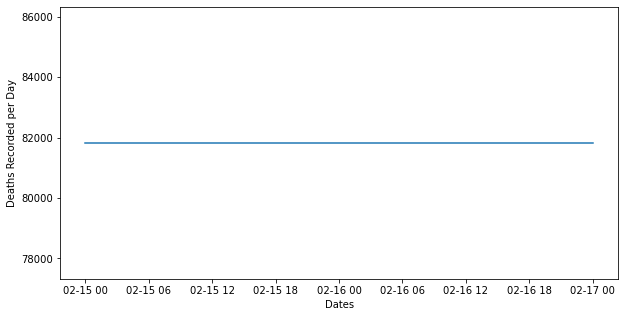

In [9]:
#plotting Deaths by date by taking dates on X-axis and deaths on Y-axis
plt.figure(figsize=(10,5))
x = TX_datewise['Date']
y = TX_datewise['Death']
plt.xlabel('Dates')
plt.ylabel('Deaths Recorded per Day')
plt.plot(x,y)
plt.show()



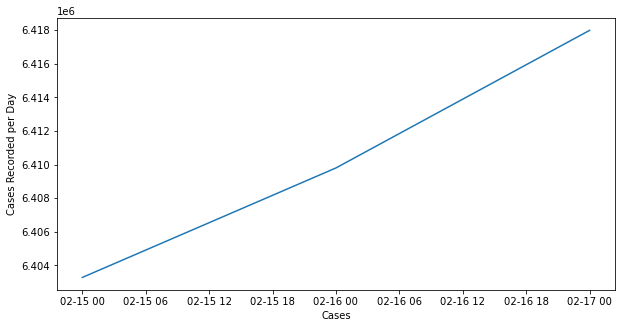

In [10]:
#plotting Cases by date by taking dates on X-axis and cases on Y-axis
plt.figure(figsize=(10,5))
x = TX_datewise['Date']
y = TX_datewise['Cases']
plt.xlabel('Cases')
plt.ylabel('Cases Recorded per Day')
plt.plot(x,y)
plt.show()

### Covid Data Analysis : Trend from 02-15-2022 to 02-22-2022

<div class="alert alert-block alert-info">
    <b>From the above plotted graphs, we see there is a constant increase in covid cases on daily basis in Texas.<br> On an average, there are 6500+ increased number of cases per day.
Though the cases are rising, there appears to be no deaths in past week.</b></div>


### ENRICHMENT DATA - CENSUS DEMOGRAPHIC ACS

The demographic enrichment dataset covers age, gender, race, and voting population information from throughout the United States. This contains the estimated population of the countries at all ages, as well as races. Data processing is done to combine it with Covid data and make the data ready for our analysis.

***Read and Display Demographic Data***

In [11]:
demograph_df = pd.read_csv(r"../../../../data/member/Apoorva/ACS Demographics and Housing Estimates.csv")
demograph_df.head()

,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,DP05_0003E,DP05_0003M,...,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM,GEO_ID,NAME
0,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,...,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",id,Geographic Area Name
1,55380,*****,55380,(X),26934,166,48.6,0.3,28446,166,...,19823,189,47.6,0.2,21824,97,52.4,0.2,0500000US01001,"Autauga County, Alabama"
2,212830,*****,212830,(X),103496,233,48.6,0.1,109334,233,...,77958,410,47.9,0.2,84925,403,52.1,0.2,0500000US01003,"Baldwin County, Alabama"
3,25361,*****,25361,(X),13421,80,52.9,0.3,11940,80,...,10529,80,53.4,0.3,9199,69,46.6,0.3,0500000US01005,"Barbour County, Alabama"
4,22493,*****,22493,(X),12150,193,54,0.9,10343,193,...,9469,102,53.6,0.4,8193,43,46.4,0.4,0500000US01007,"Bibb County, Alabama"


***Data Preprocessing before merging with Covid dataset***

In [12]:
#extracting County and State from "Geographic Area Name" column
demograph_df[['County','State']] = pd.DataFrame(demograph_df.NAME.str.split(',',expand=True))

In [13]:
#selected only required columns for analysis
Modified_demograph_df = demograph_df.loc[:,['GEO_ID','County','State','DP05_0001E','DP05_0002E',
'DP05_0003E','DP05_0004E','DP05_0005E','DP05_0006E','DP05_0007E','DP05_0008E','DP05_0009E','DP05_0010E',
'DP05_0011E','DP05_0012E','DP05_0013E','DP05_0014E','DP05_0015E','DP05_0016E','DP05_0017E','DP05_0018E',
'DP05_0030E','DP05_0031E','DP05_0037E','DP05_0038E','DP05_0039E','DP05_0044E','DP05_0052E' ]]

Modified_demograph_df.head()

,GEO_ID,County,State,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
0,id,Geographic Area Name,None,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex r...,Estimate!!SEX AND AGE!!Total population!!Under...,Estimate!!SEX AND AGE!!Total population!!5 to ...,Estimate!!SEX AND AGE!!Total population!!10 to...,...,Estimate!!SEX AND AGE!!Total population!!75 to...,Estimate!!SEX AND AGE!!Total population!!85 ye...,Estimate!!SEX AND AGE!!Total population!!Media...,Estimate!!SEX AND AGE!!Total population!!65 ye...,Estimate!!SEX AND AGE!!Total population!!65 ye...,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Bl...,Estimate!!RACE!!Total population!!One race!!Am...,Estimate!!RACE!!Total population!!One race!!Asian,Estimate!!RACE!!Total population!!One race!!Na...
1,0500000US01001,Autauga County,Alabama,55380,26934,28446,94.7,3217,3814,3600,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
2,0500000US01003,Baldwin County,Alabama,212830,103496,109334,94.7,11689,12058,14262,...,12744,4048,43,19735,22796,183471,19718,1645,1969,9
3,0500000US01005,Barbour County,Alabama,25361,13421,11940,112.4,1349,1622,1422,...,1461,405,40.4,2027,2683,11869,12066,82,134,1
4,0500000US01007,Bibb County,Alabama,22493,12150,10343,117.5,1315,1219,1132,...,1044,442,40.9,1596,1988,17272,5014,30,27,0


In [14]:
#selecting all rows except row 0 that just describes the column names
Modified_demograph_df = Modified_demograph_df.iloc[1:,:]
Modified_demograph_df

,GEO_ID,County,State,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
1,0500000US01001,Autauga County,Alabama,55380,26934,28446,94.7,3217,3814,3600,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
2,0500000US01003,Baldwin County,Alabama,212830,103496,109334,94.7,11689,12058,14262,...,12744,4048,43,19735,22796,183471,19718,1645,1969,9
3,0500000US01005,Barbour County,Alabama,25361,13421,11940,112.4,1349,1622,1422,...,1461,405,40.4,2027,2683,11869,12066,82,134,1
4,0500000US01007,Bibb County,Alabama,22493,12150,10343,117.5,1315,1219,1132,...,1044,442,40.9,1596,1988,17272,5014,30,27,0
5,0500000US01009,Blount County,Alabama,57681,28495,29186,97.6,3432,3590,4034,...,3160,1055,40.7,4609,5717,55062,928,46,212,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,0500000US72145,Vega Baja Municipio,Puerto Rico,52192,24963,27229,91.7,2355,2657,3262,...,3144,1352,41.5,4522,5636,43427,2589,64,9,1
3217,0500000US72147,Vieques Municipio,Puerto Rico,8642,4277,4365,98.0,435,578,495,...,491,322,47.0,866,983,4730,651,8,14,0
3218,0500000US72149,Villalba Municipio,Puerto Rico,22403,10856,11547,94.0,1148,1417,1283,...,1208,206,40.1,1694,2051,12713,773,0,0,0
3219,0500000US72151,Yabucoa Municipio,Puerto Rico,33499,16202,17297,93.7,1325,1963,1860,...,1923,783,42.9,3050,3583,6244,26418,0,11,0


In [15]:
#extracting countyFIPS from GEO_ID which starts after first 9 letters of GEO_ID
Modified_demograph_df['GEO_ID']=Modified_demograph_df['GEO_ID'].str.slice(start=9)

In [16]:
#Converting the GEO_ID from string to integer
Modified_demograph_df['GEO_ID'] = Modified_demograph_df['GEO_ID'].astype('int')
Modified_demograph_df.head()

,GEO_ID,County,State,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
1,1001,Autauga County,Alabama,55380,26934,28446,94.7,3217,3814,3600,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
2,1003,Baldwin County,Alabama,212830,103496,109334,94.7,11689,12058,14262,...,12744,4048,43,19735,22796,183471,19718,1645,1969,9
3,1005,Barbour County,Alabama,25361,13421,11940,112.4,1349,1622,1422,...,1461,405,40.4,2027,2683,11869,12066,82,134,1
4,1007,Bibb County,Alabama,22493,12150,10343,117.5,1315,1219,1132,...,1044,442,40.9,1596,1988,17272,5014,30,27,0
5,1009,Blount County,Alabama,57681,28495,29186,97.6,3432,3590,4034,...,3160,1055,40.7,4609,5717,55062,928,46,212,25


In [17]:
#renaming State column
Consolidated_Data.rename(columns = {'State':'State Code'},inplace=True)
Consolidated_Data

,countyFIPS,County Name,State Code,StateFIPS,Date,Cases,Death,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
2381631,56045,Weston County,WY,56,2022-02-13,1524,17,6927
2381632,56045,Weston County,WY,56,2022-02-14,1524,17,6927
2381633,56045,Weston County,WY,56,2022-02-15,1528,17,6927
2381634,56045,Weston County,WY,56,2022-02-16,1528,17,6927


In [18]:
#renaming GEO_ID to make it in sync with Covid data
Modified_demograph_df.rename(columns = {'GEO_ID':'countyFIPS'},inplace=True)
Modified_demograph_df

,countyFIPS,County,State,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
1,1001,Autauga County,Alabama,55380,26934,28446,94.7,3217,3814,3600,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
2,1003,Baldwin County,Alabama,212830,103496,109334,94.7,11689,12058,14262,...,12744,4048,43,19735,22796,183471,19718,1645,1969,9
3,1005,Barbour County,Alabama,25361,13421,11940,112.4,1349,1622,1422,...,1461,405,40.4,2027,2683,11869,12066,82,134,1
4,1007,Bibb County,Alabama,22493,12150,10343,117.5,1315,1219,1132,...,1044,442,40.9,1596,1988,17272,5014,30,27,0
5,1009,Blount County,Alabama,57681,28495,29186,97.6,3432,3590,4034,...,3160,1055,40.7,4609,5717,55062,928,46,212,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,Vega Baja Municipio,Puerto Rico,52192,24963,27229,91.7,2355,2657,3262,...,3144,1352,41.5,4522,5636,43427,2589,64,9,1
3217,72147,Vieques Municipio,Puerto Rico,8642,4277,4365,98.0,435,578,495,...,491,322,47.0,866,983,4730,651,8,14,0
3218,72149,Villalba Municipio,Puerto Rico,22403,10856,11547,94.0,1148,1417,1283,...,1208,206,40.1,1694,2051,12713,773,0,0,0
3219,72151,Yabucoa Municipio,Puerto Rico,33499,16202,17297,93.7,1325,1963,1860,...,1923,783,42.9,3050,3583,6244,26418,0,11,0


### Merging Enrichment data with Covid data

In [19]:
Covid_Demograph_Merge = pd.merge(Consolidated_Data, Modified_demograph_df, on=['countyFIPS'])
Covid_Demograph_Merge

,countyFIPS,County Name,State Code,StateFIPS,Date,Cases,Death,population,County,State,...,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869,Autauga County,Alabama,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869,Autauga County,Alabama,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869,Autauga County,Alabama,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869,Autauga County,Alabama,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869,Autauga County,Alabama,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381631,56045,Weston County,WY,56,2022-02-13,1524,17,6927,Weston County,Wyoming,...,453,149,43.1,661,709,6867,16,12,54,10
2381632,56045,Weston County,WY,56,2022-02-14,1524,17,6927,Weston County,Wyoming,...,453,149,43.1,661,709,6867,16,12,54,10
2381633,56045,Weston County,WY,56,2022-02-15,1528,17,6927,Weston County,Wyoming,...,453,149,43.1,661,709,6867,16,12,54,10
2381634,56045,Weston County,WY,56,2022-02-16,1528,17,6927,Weston County,Wyoming,...,453,149,43.1,661,709,6867,16,12,54,10


In [20]:
Covid_Demograph_Merge.columns

Index(['countyFIPS', 'County Name', 'State Code', 'StateFIPS', 'Date', 'Cases',
       'Death', 'population', 'County', 'State', 'DP05_0001E', 'DP05_0002E',
       'DP05_0003E', 'DP05_0004E', 'DP05_0005E', 'DP05_0006E', 'DP05_0007E',
       'DP05_0008E', 'DP05_0009E', 'DP05_0010E', 'DP05_0011E', 'DP05_0012E',
       'DP05_0013E', 'DP05_0014E', 'DP05_0015E', 'DP05_0016E', 'DP05_0017E',
       'DP05_0018E', 'DP05_0030E', 'DP05_0031E', 'DP05_0037E', 'DP05_0038E',
       'DP05_0039E', 'DP05_0044E', 'DP05_0052E'],
      dtype='object')

In [21]:
#deleting columns that are repetative
Covid_Demograph_Merge = Covid_Demograph_Merge.drop(['County Name'],axis=1)

In [22]:
#renaming columns to make it more readable
Covid_Demograph_Merge.rename(columns={'DP05_0001E':'Total_Population','DP05_0002E':'Total_Male','DP05_0003E':'Total_Female','DP05_0004E':'Gender_ratio','DP05_0005E':'Age_under5','DP05_0006E':
'Age_5to9','DP05_0007E':'Age_10to14','DP05_0008E':'Age_15to19','DP05_0009E':'Age_20to24',
'DP05_0010E':'Age_25to34','DP05_0011E':'Age_35to44','DP05_0012E':'Age_45to54',
'DP05_0013E':'Age_55to59','DP05_0014E':'Age_60to64','DP05_0015E':'Age_65to74',
'DP05_0016E':'Age_75to84','DP05_0017E':'Age_85over','DP05_0018E':'Median_age','DP05_0030E':'Maleover65',
'DP05_0031E':'Femaleover65','DP05_0037E':'Whiterace_pop','DP05_0038E':'Blackrace_Pop',
'DP05_0039E':'AmerInd&AlaNat_Pop','DP05_0044E':'Asian_Pop',
'DP05_0052E':'NatHaw_Pacific_Pop'},inplace=True)
Covid_Demograph_Merge.head(5)

,countyFIPS,State Code,StateFIPS,Date,Cases,Death,population,County,State,Total_Population,...,Age_75to84,Age_85over,Median_age,Maleover65,Femaleover65,Whiterace_pop,Blackrace_Pop,AmerInd&AlaNat_Pop,Asian_Pop,NatHaw_Pacific_Pop
0,1001,AL,1,2020-01-22,0,0,55869,Autauga County,Alabama,55380,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
1,1001,AL,1,2020-01-23,0,0,55869,Autauga County,Alabama,55380,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
2,1001,AL,1,2020-01-24,0,0,55869,Autauga County,Alabama,55380,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
3,1001,AL,1,2020-01-25,0,0,55869,Autauga County,Alabama,55380,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
4,1001,AL,1,2020-01-26,0,0,55869,Autauga County,Alabama,55380,...,2581,884,38.2,3594,4689,42527,10538,140,573,26
